In [119]:
import numpy as np
import pandas as pd
import seaborn as sns

from src.tools.plotter import init_plots, store_sns

init_plots()

In [120]:
file_name = f"results_false_positives.csv"

df = pd.read_csv(file_name, sep=";")
gdf = df.groupby(df.method)

DLLA_PALETTE = sns.light_palette(sns.color_palette()[0], n_colors=5)
TVLA_PALETTE = sns.light_palette(sns.color_palette()[1], n_colors=5)

THRESHOLD_COLOR = "#FF000080"

In [121]:
TITLE_LOOKUP = {
    "dlla_open": "DL-LA\n9 class",
    "dlla_wegener": "DL-LA\nWegener",
    "tvla_rho": "TVLA\n$\\rho$-test",
    "tvla_t_1": "TVLA\n$t$-test, $\mu_1$",
    "tvla_t_2": "TVLA\n$t$-test, $\mu_2$",
    "tvla_t_3": "TVLA\n$t$-test, $\mu_3$",
}

COLOR_LOOKUP = {
    "dlla_open": DLLA_PALETTE[1],
    "dlla_wegener": DLLA_PALETTE[3],
    "tvla_rho": TVLA_PALETTE[1],
    "tvla_t_1": TVLA_PALETTE[2],
    "tvla_t_2": TVLA_PALETTE[3],
    "tvla_t_3": TVLA_PALETTE[4],
}

def title(arr):
    return [TITLE_LOOKUP[m] for m in arr]

def palette(arr):
    return [COLOR_LOOKUP[m] for m in arr]

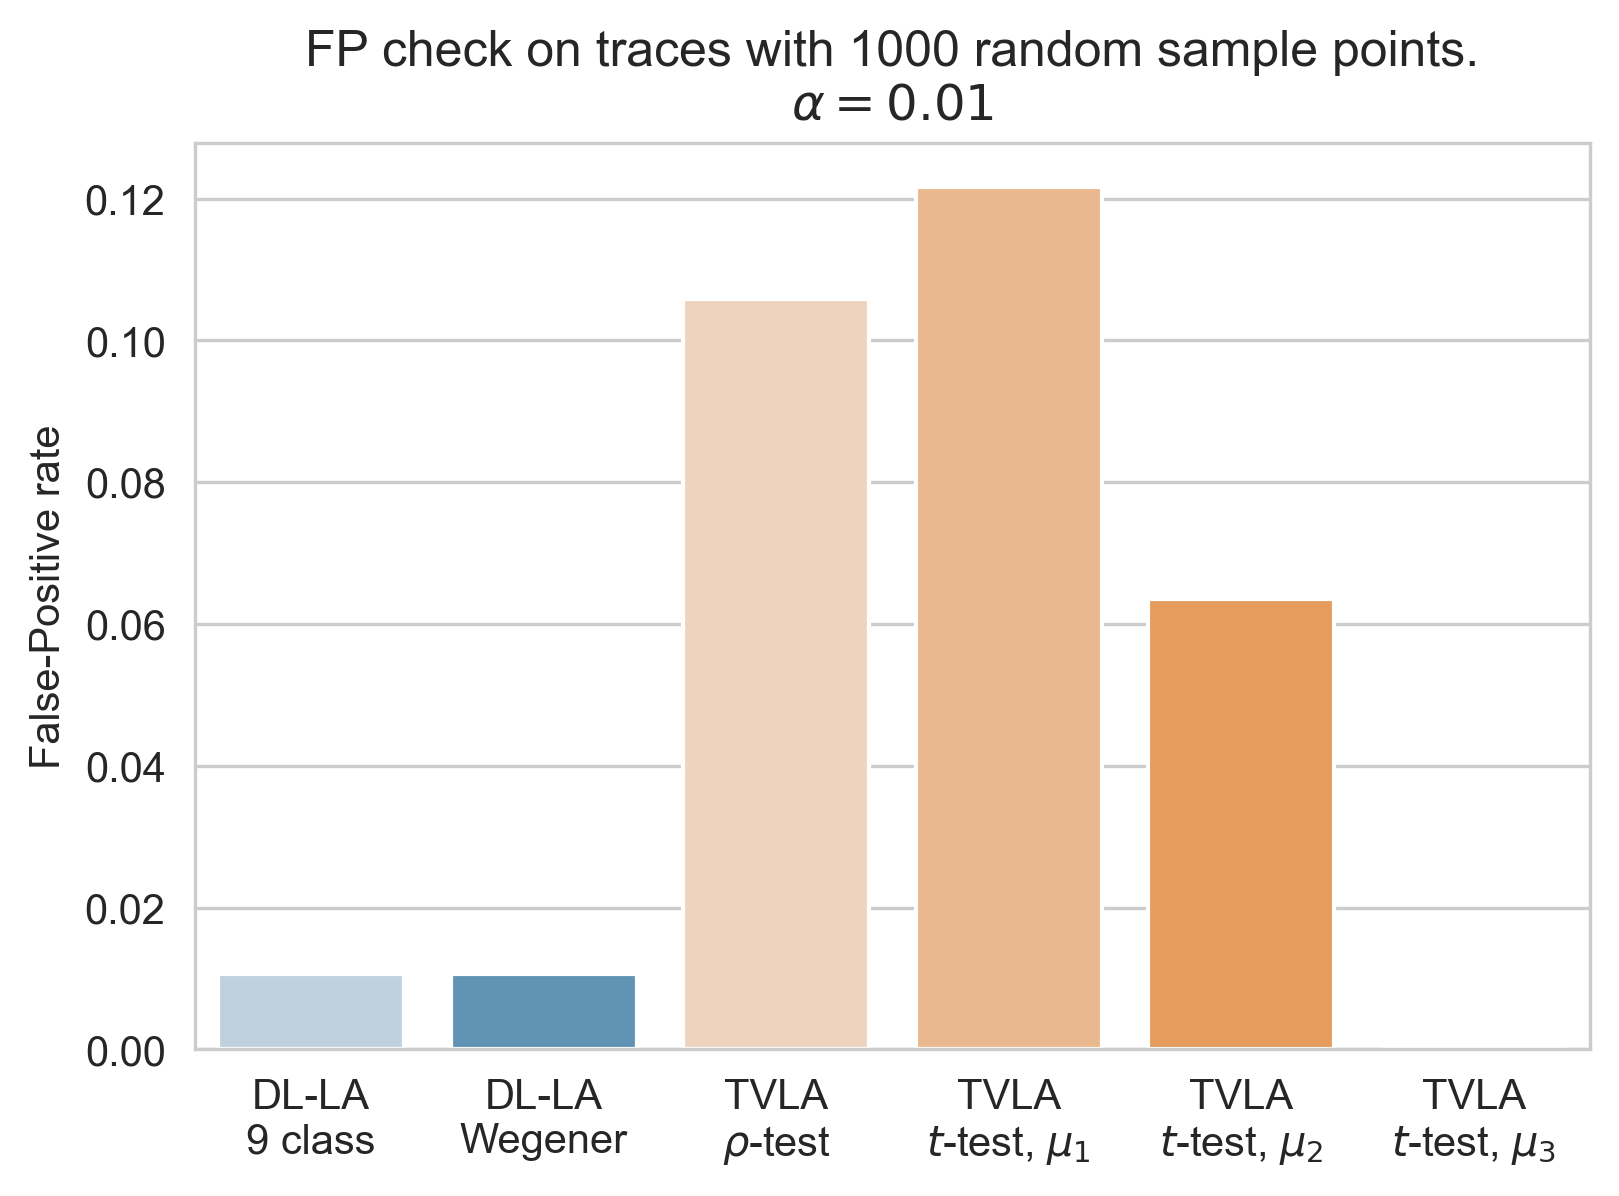

In [122]:
methods = np.unique(df.method)
fpr = []
color = []
for method in methods:
    num_fp = np.sum(np.array(gdf.get_group(method).p < .01))
    total = len(gdf.get_group(method).p)
    fpr.append(num_fp / total)
    color.append(COLOR_LOOKUP[method])

G = sns.barplot(x="method", y="fpr", data={"method": title(methods), "fpr": fpr},
            palette=palette(methods))
G.set(title="FP check on traces with 1000 random sample points.\n$\\alpha = 0.01$", ylabel="False-Positive rate")
store_sns(G, "fp-check")